In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
df=pd.read_csv('Loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.shape

(614, 13)

In [36]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [39]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
list1=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [43]:
df['LoanAmount']=df['LoanAmount'].fillna((df['LoanAmount']).mean())
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [44]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term']).mean())
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [45]:
df['Credit_History']=df['Credit_History'].fillna((df['Credit_History']).mean())
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [48]:
df.shape

(614, 13)

In [49]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [50]:
df.skew()

Loan_ID              0.000000
Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<AxesSubplot:>

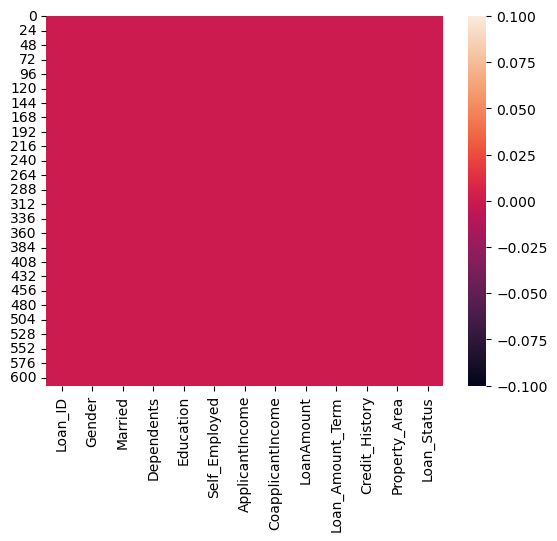

In [51]:
sns.heatmap(df.isnull())

Loan_ID                  AxesSubplot(0.125,0.77;0.168478x0.11)
Gender                AxesSubplot(0.327174,0.77;0.168478x0.11)
Married               AxesSubplot(0.529348,0.77;0.168478x0.11)
Dependents            AxesSubplot(0.731522,0.77;0.168478x0.11)
Education               AxesSubplot(0.125,0.638;0.168478x0.11)
Self_Employed        AxesSubplot(0.327174,0.638;0.168478x0.11)
ApplicantIncome      AxesSubplot(0.529348,0.638;0.168478x0.11)
CoapplicantIncome    AxesSubplot(0.731522,0.638;0.168478x0.11)
LoanAmount              AxesSubplot(0.125,0.506;0.168478x0.11)
Loan_Amount_Term     AxesSubplot(0.327174,0.506;0.168478x0.11)
Credit_History       AxesSubplot(0.529348,0.506;0.168478x0.11)
Property_Area        AxesSubplot(0.731522,0.506;0.168478x0.11)
Loan_Status             AxesSubplot(0.125,0.374;0.168478x0.11)
dtype: object

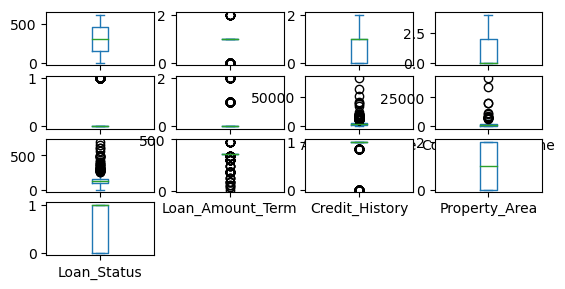

In [52]:
df.plot(kind='box',subplots=True,layout=(6,4))

Loan_ID                  AxesSubplot(0.125,0.77;0.168478x0.11)
Gender                AxesSubplot(0.327174,0.77;0.168478x0.11)
Married               AxesSubplot(0.529348,0.77;0.168478x0.11)
Dependents            AxesSubplot(0.731522,0.77;0.168478x0.11)
Education               AxesSubplot(0.125,0.638;0.168478x0.11)
Self_Employed        AxesSubplot(0.327174,0.638;0.168478x0.11)
ApplicantIncome      AxesSubplot(0.529348,0.638;0.168478x0.11)
CoapplicantIncome    AxesSubplot(0.731522,0.638;0.168478x0.11)
LoanAmount              AxesSubplot(0.125,0.506;0.168478x0.11)
Loan_Amount_Term     AxesSubplot(0.327174,0.506;0.168478x0.11)
Credit_History       AxesSubplot(0.529348,0.506;0.168478x0.11)
Property_Area        AxesSubplot(0.731522,0.506;0.168478x0.11)
Loan_Status             AxesSubplot(0.125,0.374;0.168478x0.11)
dtype: object

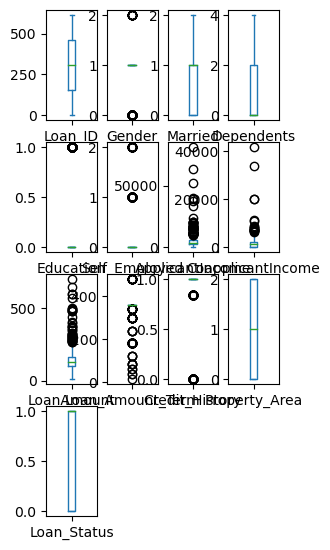

In [53]:
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(3,10))

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.382616,1.357847,0.752060,0.528362,0.445039,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,1.723590,0.382616,0.705812,0.141102,0.528362,0.445039,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,1.717948,0.382616,0.705812,0.752060,0.528362,1.426564,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,1.712307,0.382616,0.705812,0.752060,1.892641,0.445039,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,1.706665,0.382616,1.357847,0.752060,0.528362,0.445039,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,1.990376,1.357847,0.752060,0.528362,0.445039,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,1.712307,0.382616,0.705812,1.927426,0.528362,0.445039,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,1.717948,0.382616,0.705812,0.141102,0.528362,0.445039,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,1.723590,0.382616,0.705812,1.034264,0.528362,0.445039,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [55]:
threshold=3
print(np.where(z>3))

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([7, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 6, 8, 9, 6, 8, 5, 5, 6, 8,
       7, 8, 6, 6, 5, 5, 5, 9, 9, 5, 8, 5, 8, 9, 5, 6, 8, 5, 5, 8, 5, 5,
       5, 7, 6, 5, 7, 5, 8, 6, 5, 5, 5, 8, 9, 9, 8, 8, 8, 5, 5, 9, 8, 9,
       5, 7, 9, 5, 7, 5, 8], dtype=int64))


In [56]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


<AxesSubplot:>

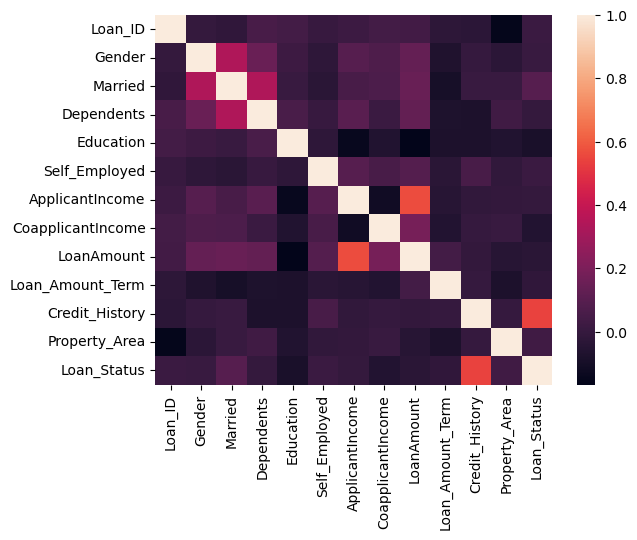

In [57]:
sns.heatmap(dfcor)

<AxesSubplot:>

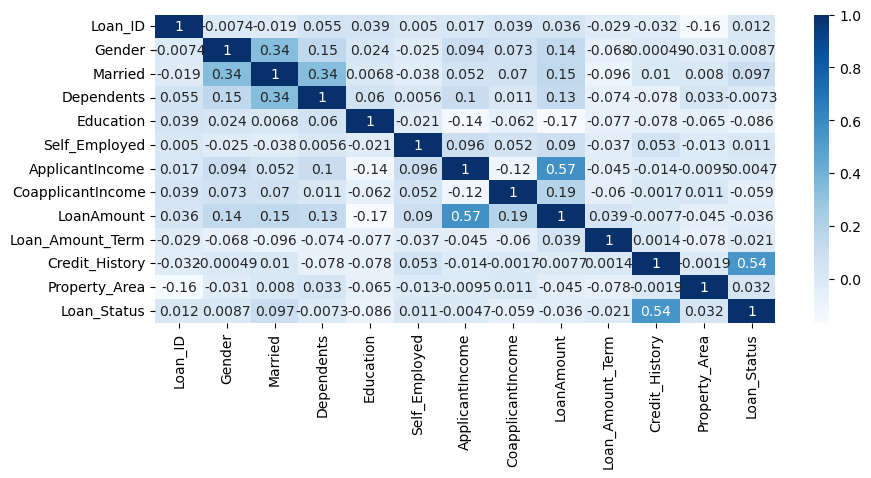

In [58]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

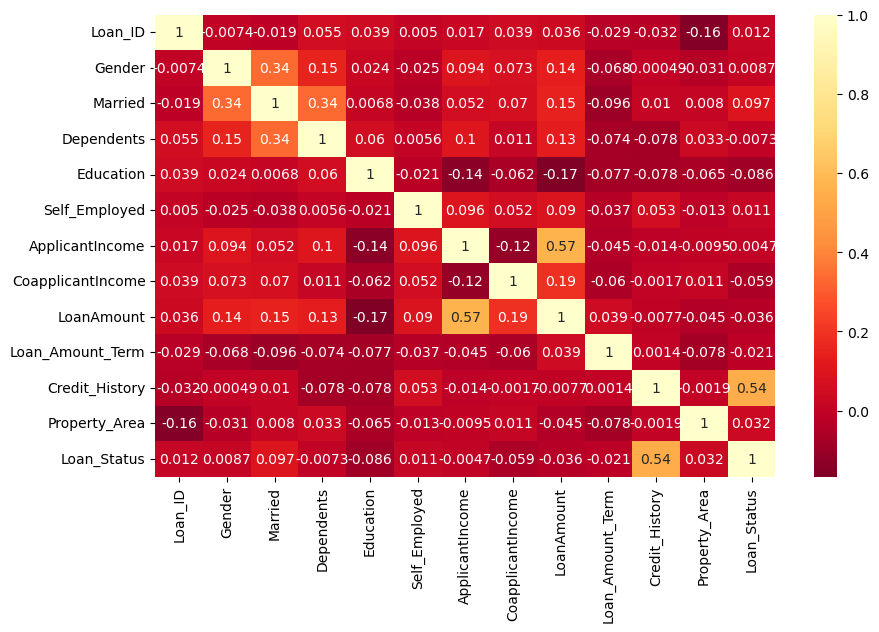

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

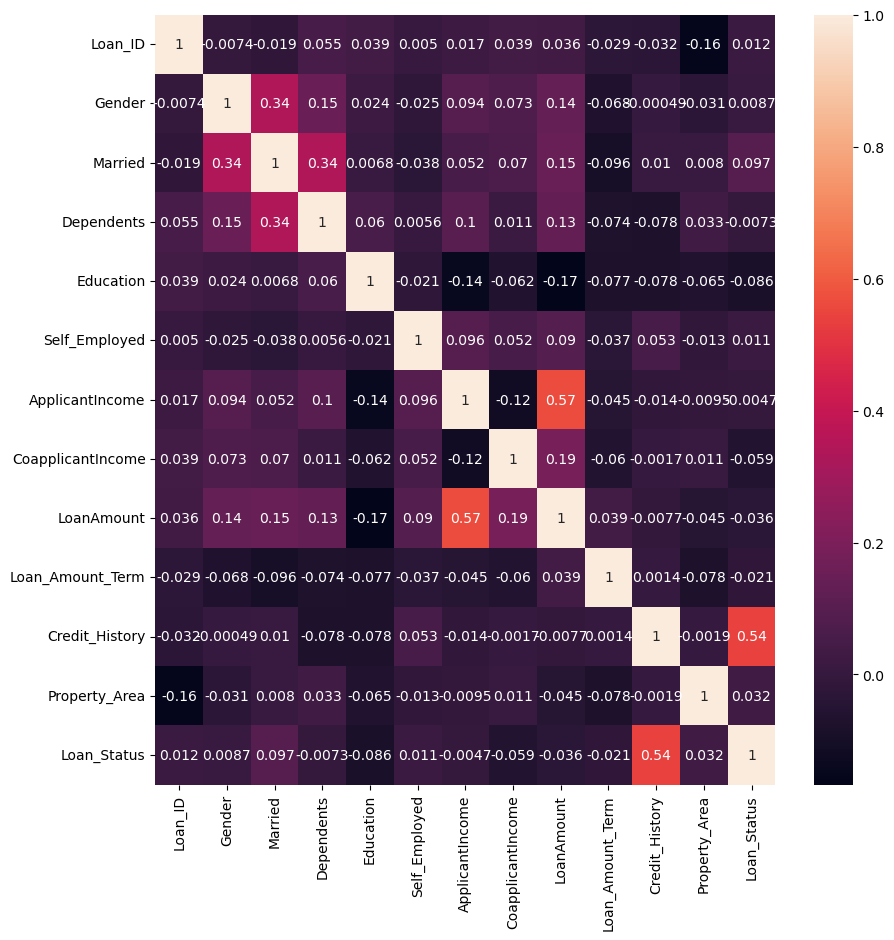

In [60]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [61]:
A=df.iloc[:,:]
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [62]:
x=df.iloc[:,0:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [63]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [65]:
dtc=DecisionTreeClassifier()     
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6911764705882353
[[20 21]
 [21 74]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        41
           1       0.78      0.78      0.78        95

    accuracy                           0.69       136
   macro avg       0.63      0.63      0.63       136
weighted avg       0.69      0.69      0.69       136



In [66]:
knn=KNeighborsClassifier()     
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6911764705882353
[[20 21]
 [21 74]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        41
           1       0.78      0.78      0.78        95

    accuracy                           0.69       136
   macro avg       0.63      0.63      0.63       136
weighted avg       0.69      0.69      0.69       136



C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.4485294117647059
[[16 25]
 [50 45]]
              precision    recall  f1-score   support

           0       0.24      0.39      0.30        41
           1       0.64      0.47      0.55        95

    accuracy                           0.45       136
   macro avg       0.44      0.43      0.42       136
weighted avg       0.52      0.45      0.47       136



In [68]:
svc=SVC(kernel='rbf')      # kernel='rdf'------>default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6911764705882353
[[ 0 41]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.70      0.99      0.82        95

    accuracy                           0.69       136
   macro avg       0.35      0.49      0.41       136
weighted avg       0.49      0.69      0.57       136



In [69]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6911764705882353
[[ 1 40]
 [ 2 93]]
              precision    recall  f1-score   support

           0       0.33      0.02      0.05        41
           1       0.70      0.98      0.82        95

    accuracy                           0.69       136
   macro avg       0.52      0.50      0.43       136
weighted avg       0.59      0.69      0.58       136



In [70]:
def dtc_f():
    dtc=DecisionTreeClassifier()     
    dtc.fit(x_train,y_train)
    dtc.score(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print(accuracy_score(y_test,preddtc))
    print(confusion_matrix(y_test,preddtc))
    print(classification_report(y_test,preddtc))

In [71]:
dtc_f()

0.6838235294117647
[[19 22]
 [21 74]]
              precision    recall  f1-score   support

           0       0.47      0.46      0.47        41
           1       0.77      0.78      0.77        95

    accuracy                           0.68       136
   macro avg       0.62      0.62      0.62       136
weighted avg       0.68      0.68      0.68       136



In [72]:
from sklearn.model_selection import cross_val_score


score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.44715447 0.5203252  0.44715447 0.52845528 0.51639344]
0.49189657470345194
0.03673835683588675


In [73]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.69105691 0.69105691 0.68292683 0.69105691 0.68852459]
0.6889244302279087
0.003155107179298986


In [74]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71544715 0.53658537 0.73170732 0.80487805 0.63114754]
0.6839530854324937
0.09208784945186987


In [77]:
import numpy as np
s=np.array([610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0])
s

array([6.100e+02, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
       4.106e+03, 0.000e+00, 4.000e+01, 1.800e+02, 1.000e+00, 0.000e+00])

In [78]:
s.shape

(12,)

In [79]:
s=s.reshape(1,-1)

In [80]:
s.shape

(1, 12)

In [81]:
predvalue=dtc.predict(s)
predvalue

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [82]:
def testpredict(s):
    s=s.reshape(1,-1)
    print("s.shape is",s.shape)
    predvalue=svc.predict(s)
    print(predvalue)
    

In [83]:
s=np.array([4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2])
testpredict(s)

s.shape is (1, 12)
[1]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [84]:
lg=LogisticRegression()

In [85]:
lg.fit(x_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
pred=lg.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1])

In [87]:
accuracy_score(y_test,pred)

0.7352941176470589

In [88]:
print(confusion_matrix(y_test,pred))

[[12 29]
 [ 7 88]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.29      0.40        41
           1       0.75      0.93      0.83        95

    accuracy                           0.74       136
   macro avg       0.69      0.61      0.62       136
weighted avg       0.72      0.74      0.70       136



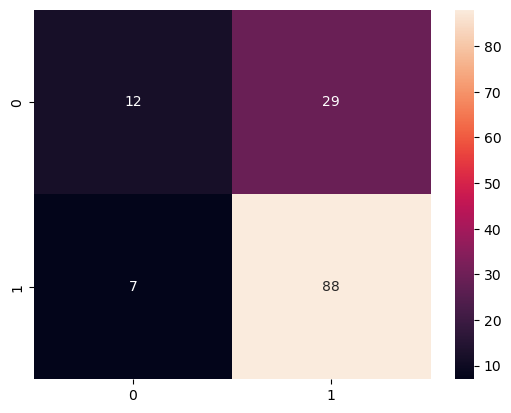

In [90]:
p=confusion_matrix(y_test,pred)
sns.heatmap(p,annot=True)
plt.show()

In [104]:
def loanpredict(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print("predicted value:",pred)
    if pred==0:
        print("Loan Application Approved")
    else:
        print("Loan Application pending")
        

In [105]:
p=np.array([612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2])

In [106]:
loanpredict(p)

predicted value: [1]
Loan Application pending


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
